In [39]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit

<center>
<h1>Étude d'un mouvement et tracés de vecteurs à l'aide de Python</h1>
</center>

> L'objectif de ce document est d'étudier le mouvement filmé d'une balle et de construire les vecteurs vitesse $\vec{v}$, accélération $\vec{a}$ et de comparer ce dernier à la résultante des forces, pour chacune des positions.

## Partie expérimentale

- Charger la [vidéo](https://www.icloud.com/iclouddrive/0abbeE5zMjRBUFT3AcmJjy3fg#BallTossOut) dans le logiciel [Mecachrono](https://www.eleves.online/MecaChrono/index.php?A=7&B=0&C=0&D=15&E=16&H=-1682993887&lang=fr).
- Sélectionner « 30 images par seconde » et « un échantillon toutes les 1 images ».
- Placer l'origine et le repère à un endroit qui vous semblera opportun (on peut aussi ne pas modifier sa position).
- Définir l'échelle en utilisant la règle à l'écran : **chaque segment vertical jaune mesure 10 cm de long. En selectionner 10.**
- Cliquer sur les différentes positions de la balle.
- Sélectionner l'onglet « Tableau de valeurs » et exporter les données sous une forme directement exploitable sous Python.

## Exploitation

Q1 - Insérer les listes contenant les dates $t$ et les valeurs des coordonnées $x$ et $y$.

In [40]:
t = [ 0, 0.0333333, 0.0666666, 0.0999999, 0.133333, 0.166666, 0.2, 0.233333, 0.266666, 0.3, 0.333333, 0.366666, 0.4, 0.433333, 0.466666, 0.499999, 0.533333, 0.566666, 0.599999, 0.633333, 0.666666]
x = [0.281197, 0.340018, 0.395274, 0.454095, 0.511134, 0.568173, 0.625212, 0.68225, 0.741071, 0.79811, 0.855149, 0.91397, 0.974574, 1.03161, 1.09043, 1.14747, 1.20629, 1.2669, 1.3275, 1.3881, 1.45227]
y = [0.650325, 0.723406, 0.784009, 0.835701, 0.874915, 0.903434, 0.921259, 0.928389, 0.924824, 0.908782, 0.883827, 0.846395, 0.794704, 0.735883, 0.662802, 0.579026, 0.486338, 0.379391, 0.261748, 0.129846, -0.0127504]

Q2 - Compléter le code suivant, l'objectif étant d'afficher cette trajectoire.

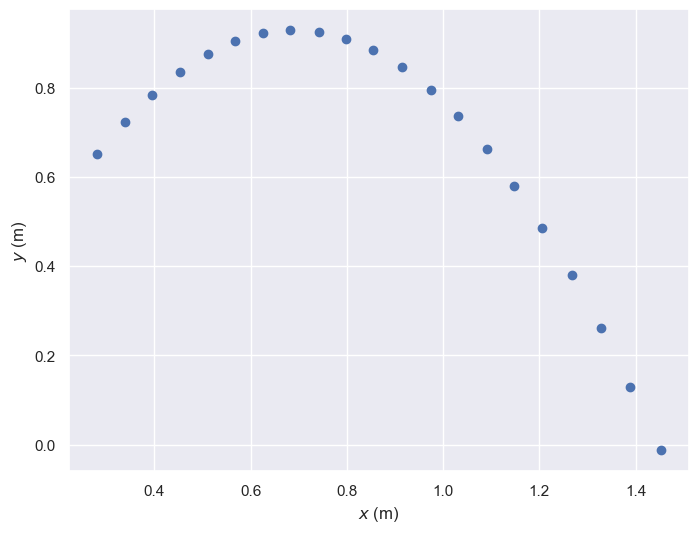

In [41]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(x, y, 'o')
plt.xlabel("$x$ (m)")
plt.ylabel("$y$ (m)")
plt.show()

Q3 - On cherche à tracer l'évolution de l'abscisse horizontale $x$ en fonction du temps $t$.    
Compléter le code suivant.

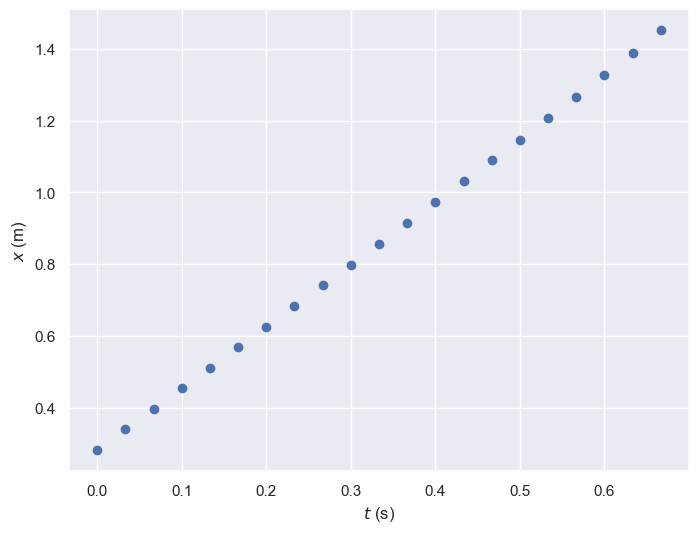

In [42]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(t, x, 'o')
plt.xlabel("$t$ (s)")
plt.ylabel("$x$ (m)")
plt.show()

5. Comment peut-on qualifier le mouvement horizontal ?

Q4 - On cherche à tracer l'évolution de l'ordonnée $y$ en fonction du temps $t$.   
Compléter le code suivant. 

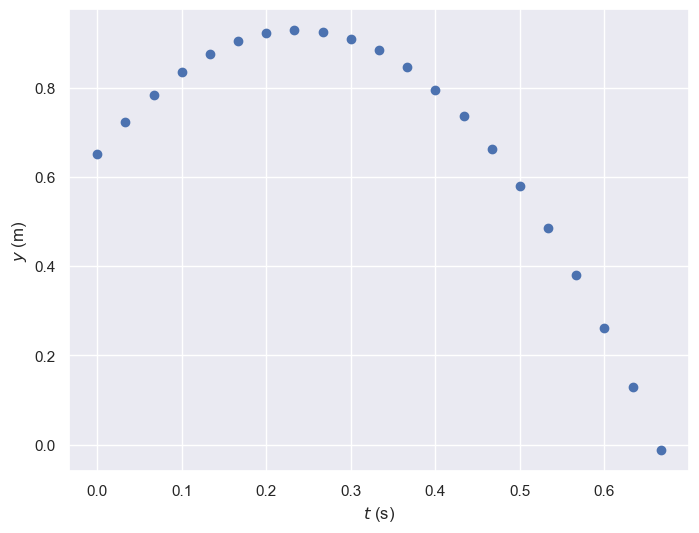

In [43]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(t, y, 'o')
plt.xlabel("$t$ (s)")
plt.ylabel("$y$ (m)")
plt.show()

7. Le mouvement vertical est-il : uniforme ? accéléré ? nul ?

Q5 - Compléter le code des fonctions `modele_x` et `modele_y` suivantes en fonction du comportement global des fonctions $x(t)$ et $y(t)$ constaté lors des questions précédentes.

In [44]:
# Nouvelles dates pour l'affichage des grandeurs modélisées
t_mod = np.linspace(min(t), max(t), 101)

# Fonction modèle pour le comportement de x en fonction de t
def modele_x(x, a, b):
    return a * x + b

# Fonction modèle pour le comportement de y en fonction de t
def modele_y(x, a, b, c):
    return a * x**2 + b * x + c

# Détermination des paramètres optimaux pour x en fonction de t
popt, pcov = curve_fit(modele_x, t, x)
a_xmod = popt[0]
b_xmod = popt[1]

# Détermination des paramètres optimaux pour y en fonction de t
popt, pcov = curve_fit(modele_y, t, y)
a_ymod = popt[0]
b_ymod = popt[1]
c_ymod = popt[2]

# Valeurs de x modélisées
x_mod = modele_x(t_mod, a_xmod, b_xmod)

# Valeurs de y modélisées
y_mod = modele_y(t_mod, a_ymod, b_ymod, c_ymod)

Q6 - Compléter le code suivant, l'objectif est d'afficher $x(t)$, $y(t)$, $x_{mod}(t_{mod})$ et $y_{mod}(t_{mod})$ afin de vérifier la pertinence de la modélisation.

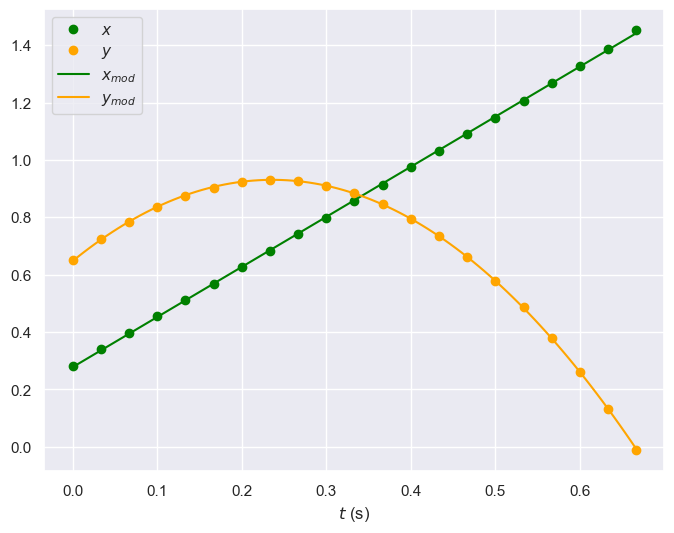

In [45]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(t, x, 'o', label="$x$", color="green")
plt.plot(t, y, 'o', label="$y$", color="orange")
plt.plot(t_mod, x_mod, '-', label="$x_{mod}$", color="green")
plt.plot(t_mod, y_mod, '-', label="$y_{mod}$", color="orange")
plt.xlabel("$t$ (s)")
plt.legend()
plt.show()

Q7 - Compléter le code suivant et répondre aux questions.

In [46]:
vx = [0] * len(t_mod)  # Que fait-on ?
vy = [0] * len(t_mod)  # Que fait-on ?

for i in range(1, len(t_mod) - 1):   # Pourquoi cet intervalle ?
    vx[i] = (x_mod[i + 1] - x_mod[i - 1]) / (t_mod[i + 1] - t_mod[i - 1])
    vy[i] = (y_mod[i + 1] - y_mod[i - 1]) / (t_mod[i + 1] - t_mod[i - 1])

Q8 - Compléter le code suivant, l'objectif est de tracer l'évolution au cours du temps des composantes du vecteur vitesse $\vec{v}$.

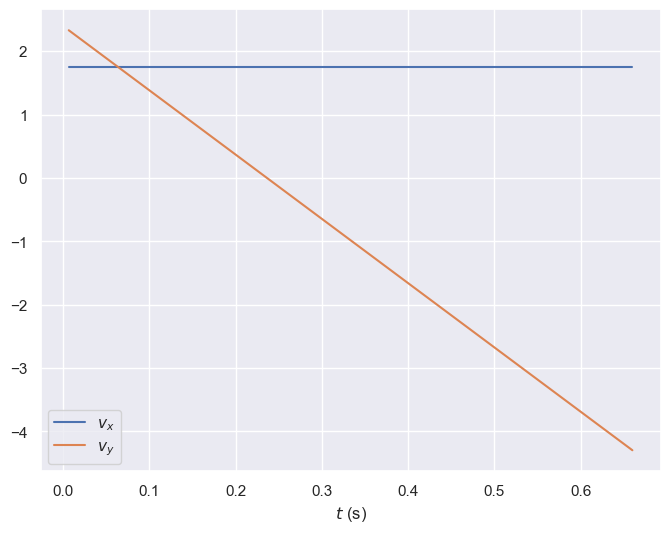

In [47]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(t_mod[1: -1], vx[1: -1], '-', label="$v_x$")
plt.plot(t_mod[1: -1], vy[1: -1], '-', label="$v_y$")
plt.xlabel("$t$ (s)")
plt.legend()
plt.show()

Q9 - Compléter le code suivant, l'objectif est de constuire les composantes $a_x$ et $a_y$ du vecteur accélération $\vec{a}$.      
Répondre aux questions.

In [48]:
ax = [0] * len(t_mod)  # Que fait-on ?
ay = [0] * len(t_mod)  # Que fait-on ?

for i in range(2, len(t_mod) - 2):  # Pourquoi cet intervalle ?
    ax[i] = (vx[i + 1] - vx[i - 1]) / (t_mod[i + 1] - t_mod[i - 1])
    ay[i] = (vy[i + 1] - vy[i - 1]) / (t_mod[i + 1] - t_mod[i - 1])

Q10 - Compléter le code suivant, l'objectif est d'afficher les composantes $a_x$ et $a_y$ du vecteur accélération $\vec{a}$.     
Commenter les allures des courbes.

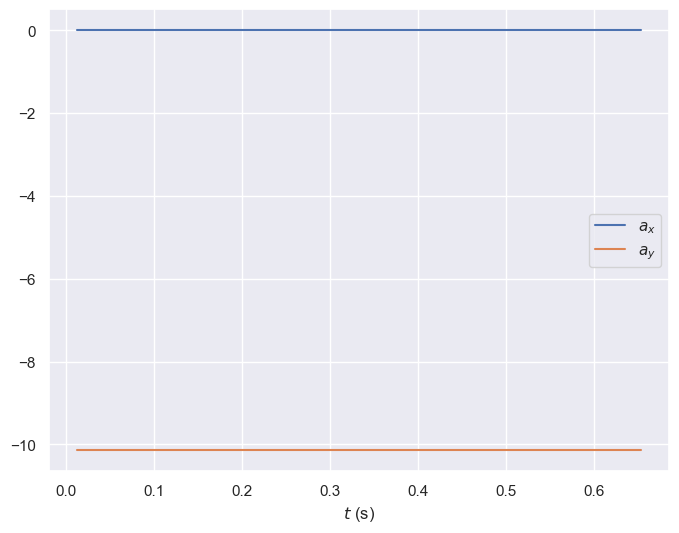

In [49]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(t_mod[2: -2], ax[2: -2], '-', label="$a_x$")
plt.plot(t_mod[2: -2], ay[2: -2], '-', label="$a_y$")
plt.xlabel("$t$ (s)")
plt.legend()
plt.show()

Q11 - Dire quelles sont les grandeurs représentées sur le graphique qui suit.

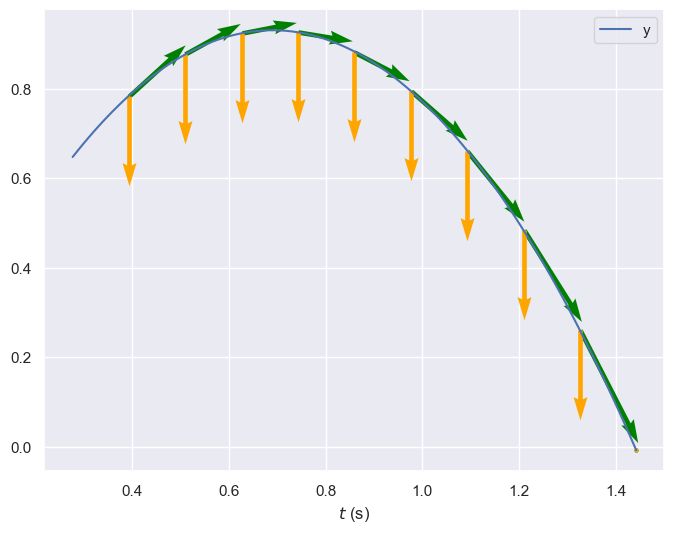

In [50]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(x_mod, y_mod, '-', label="y")
for i in range(1, len(x_mod)):
    if i % 10 == 0:
        plt.quiver(x_mod[i], y_mod[i], vx[i], vy[i], angles="xy", color="green", scale=20)
        plt.quiver(x_mod[i], y_mod[i], 0, ay[i], angles="xy", color="orange", scale=70)
        #plt.text(x_mod[i]+10, y_mod[i]+10, "jkl")
plt.xlabel("$t$ (s)")
plt.legend()
plt.show()